Worksheet 2 Gradient and Hessian
by Prof J.Morlier February 2020

#import Base.print_matrix
#import Pkg; Pkg.add("SymPy")

In [32]:
using LinearAlgebra, SparseArrays, SuiteSparse, Random
using SymPy
using Plots; pyplot()
import Base.print_matrix



In [33]:
versioninfo()

Julia Version 1.3.1
Commit 2d5741174c (2019-12-30 21:36 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin18.6.0)
  CPU: Intel(R) Core(TM) i5-8259U CPU @ 2.30GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, skylake)


#1

A 2x2 Recap

In [34]:
entries = @syms x1 x2  real=true


(x1, x2)

In [35]:
J=2*x1^3 +3*x2^2 +3*x2*x1^2 -24*x2


    3       2          2        
2⋅x₁  + 3⋅x₁ ⋅x₂ + 3⋅x₂  - 24⋅x₂

Gradient computing

In [36]:
dJdx1=diff(J,x1)  ;

dJdx2=diff(J,x2) ;

dJ=[dJdx1; dJdx2]

2-element Array{Sym,1}:
   6*x1^2 + 6*x1*x2
 3*x1^2 + 6*x2 - 24

Hessian computing

In [37]:
Hdx11=diff(dJdx1,x1);

In [38]:
Hdx12=diff(dJdx2,x1);

In [39]:
Hdx21=diff(dJdx2,x1);

In [40]:
Hdx22=diff(dJdx2,x2);

In [41]:
H=[Hdx11 Hdx12; Hdx21 Hdx22]

2×2 Array{Sym,2}:
 12*x1 + 6*x2  6*x1
         6*x1     6

substitute with Saddle Point (0,4);(4,-4);(-2,2)

In [42]:
A=[Hdx11(0,4) Hdx12(0,4); Hdx21(0,4) Hdx22(0,4)]


2×2 Array{Sym,2}:
 48  0
  0  6

In [43]:
det(A)

288

#2

In [44]:
tr(A)

54

In [45]:
Lambda=eigvals(A)

2-element Array{Sym,1}:
 48
  6

Since both eigenvalues are positive, we conclude that the function takes a (local) minimum at p*=(x1*,x2*)=(0,4).
One can indeed confirm this by plotting the function around this point in Matlab. 

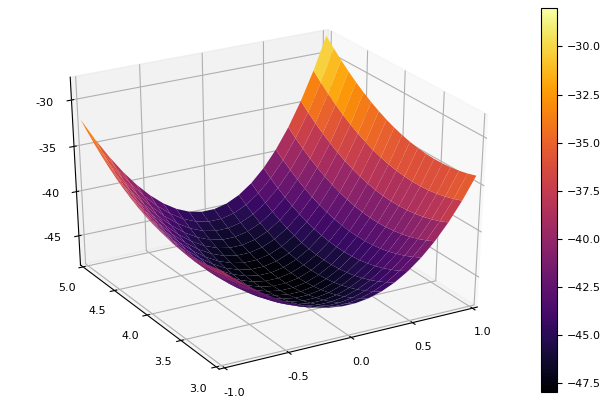

In [46]:
x=range(-1,stop=1,length=20)
y=range(3,stop=5,length=20)
f(x,y) = 2*x^3 +3*y^2 +3*y*x^2 -24*y
plot(x,y,f,st=:surface,camera=(-30,30))

In [47]:
function gradient2(J,x1,x2)

dJdx1=diff(J,x1)  ;

dJdx2=diff(J,x2) ;
dJ=[dJdx1; dJdx2]
return dJ
end

gradient2 (generic function with 1 method)

In [48]:
function hessian2(dJ,x1,x2)
    
Hdx11=diff(dJ[1],x1);
Hdx12=diff(dJ[1],x2);

Hdx21=diff(dJ[2],x1);

Hdx22=diff(dJ[2],x2);
H=[Hdx11 Hdx12; Hdx21 Hdx22]
return H
end

hessian2 (generic function with 1 method)

In [54]:
#2

In [55]:
J=(x1^2 +x2^2 -1)^2 + (x2^2 -1)^2

         2                  2
⎛  2    ⎞    ⎛  2     2    ⎞ 
⎝x₂  - 1⎠  + ⎝x₁  + x₂  - 1⎠ 

In [56]:
dJ=gradient2(J,x1,x2)

2-element Array{Sym,1}:
                   4*x1*(x1^2 + x2^2 - 1)
 4*x2*(x2^2 - 1) + 4*x2*(x1^2 + x2^2 - 1)

In [57]:
H=hessian2(dJ,x1,x2)

2×2 Array{Sym,2}:
 12*x1^2 + 4*x2^2 - 4               8*x1*x2
              8*x1*x2  4*x1^2 + 24*x2^2 - 8

substitute with Saddle Point (0,0);etc..

In [60]:
A=[H[1,1](0,0) H[1,2](0,0); H[2,1](0,0) H[2,2](0,0)]

2×2 Array{Sym,2}:
 -4   0
  0  -8

In [61]:
det(A)

32

In [62]:
tr(A)

-12

In [63]:
Lambda=eigvals(A)

2-element Array{Sym,1}:
 -8
 -4

Since both eigenvalues are negative, we conclude that the function takes a (local) maximum at p*=(x1*,x2*)=(0,0).
One can indeed confirm this by plotting the function around this point in Matlab. 

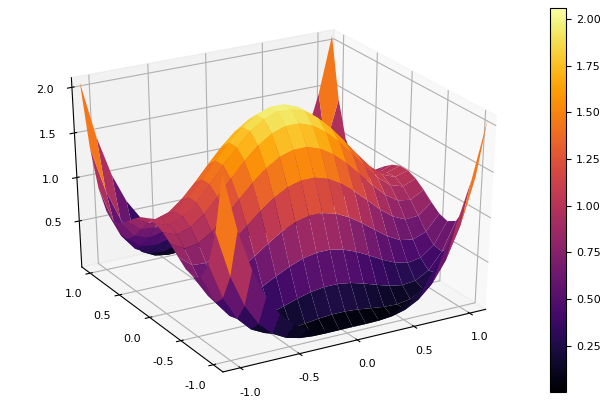

In [64]:
x=range(-1.1,stop=1.1,length=20)
y=range(-1.1,stop=1.1,length=20)
f(x,y) = (x^2 +y^2 -1)^2 + (y^2 -1)^2
plot(x,y,f,st=:surface,camera=(-30,30))

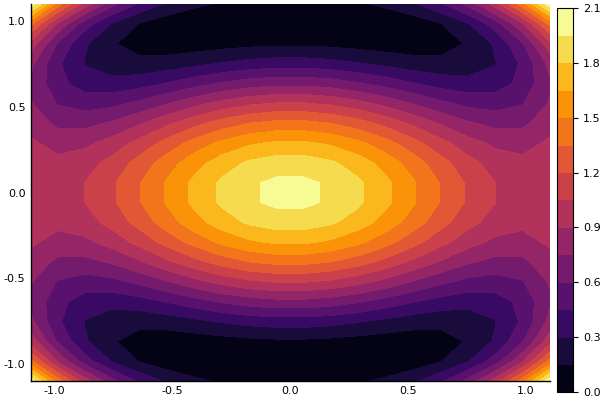

In [66]:
plot(x,y,f,st=:contourf,camera=(-0,0))